<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Introduction to DS
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import LinearSVC , SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Data preparation

In [2]:
clean_df = pd.read_csv('../data/processed/video_data_processed.csv').copy()

In [3]:
clean_df.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year
4858,HAY-3TnAi7Y,Luke Barousse,"Totals, Average Lines, & Trend Lines (Analytic...",Tableau Fundamentals (DataCamp) 👉🏼 https://luk...,Tableau|Analytics Pane|Totals|Average Lines|Tr...,2020-10-01 03:21:39+00:00,7861,130,13,556,hd,False,3,1,3,10,2020
21016,VOi6LWzkCf4,Leo Isikdogan,"Chicago Timelapse | Merchandise Mart, Navy Pie...",This is my last week in Chicago. I made this t...,timelapse|city|chicago|navy pier|downtown|shed...,2018-05-11 20:24:40+00:00,639,21,2,91,hd,False,20,11,4,5,2018
9627,MXM6VEtf8SE,ArjanCodes,Refactoring A PDF And Web Scraper Part 1 // CO...,Visit https://bit.ly/ARJAN50 to get 50% off th...,web scraper|web scraping|python programming|da...,2021-12-03 16:00:18+00:00,41347,1460,103,2264,hd,False,16,3,4,12,2021
59224,oNyDux6c1dQ,Orange Data Mining,Correlations,"Description for YouTube\r\nIn this video, you’...",(notag),2023-07-11 09:25:02+00:00,2171,47,1,222,hd,True,9,11,1,7,2023
38533,m12k2OASMjk,Smitha Kolan - Machine Learning Engineer,These Are The Highest Paid Tech Salaries In 2022,Check out ProjectPro: \r\nhttps://bit.ly/34HXn...,how to learn machine learning|machine learning...,2022-02-23 10:53:47+00:00,11734,353,23,670,hd,False,10,23,2,2,2022


## Problem Statement
- <font color=lightgreen>Problem</font>: Classify videos into trending or non-trending categories, the goal is to predict whether a video is likely to become "Trending" or not.
- <font color=lightgreen>What are the benefits of solving this problem ?</font> 
    - Predicting video trends can bring significant benefits to online video platforms, content managers, advertisers, and enhance user experiences. It's useful for predicting trends and helps content creators optimize their video release strategies.The key is leveraging insights from the classification model to optimize strategies and deliver the best value for both users and content managers.

## Feature engineering

### Select features (independent variables) and the target variable (dependent variable)
- Here, we will construct a classification model for predicting the video engagement. Our target variable will be `Trending` and we will examine our columns to select suitable features.
- Firstly, we have to create the new feature `Trending` based on `viewCount`.
- <font color=red>Noted:</font> We assume that `low`: 0, `medium`: 1, `high`: 2

Visualize the distribution of engagement values

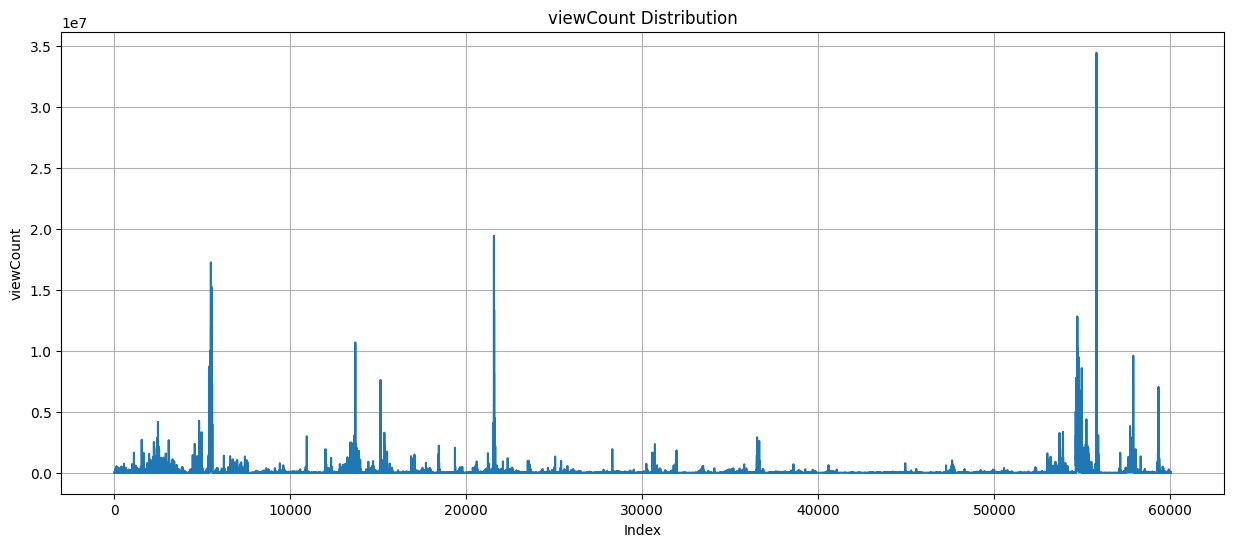

In [4]:
plt.figure(figsize=(15, 6))
plt.plot(clean_df['viewCount'])
plt.title('viewCount Distribution')
plt.xlabel('Index')
plt.ylabel('viewCount')
plt.grid(True)
plt.show()

Create a `Trending` column based on our criteria for the `viewCount` values, where labels 'low', 'medium', 'high' are assigned based on the mean value.

In [5]:
# calculate mean of viewCount
mean_engagement = clean_df['viewCount'].mean()

# assign labels based on the engagement
clean_df['Trending'] = pd.cut(clean_df['viewCount'], 
                               bins=[float('-inf'), mean_engagement, mean_engagement *10, float('inf')], 
                               labels=False)

## Baseline model comparison

In [6]:
X = clean_df[['likeCount', 'commentCount', 'hour', 'day', 'month', 'year']]
y = clean_df['Trending']

In [7]:
# dividing data into train, valid and test sets
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y ,test_size=0.3, random_state= 2023,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp ,test_size=0.5, random_state= 2023,stratify=y_tmp)

In [8]:
seed = 2023
models = [
    LinearSVC(random_state=seed, dual=False, max_iter=1000),
    SVC(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

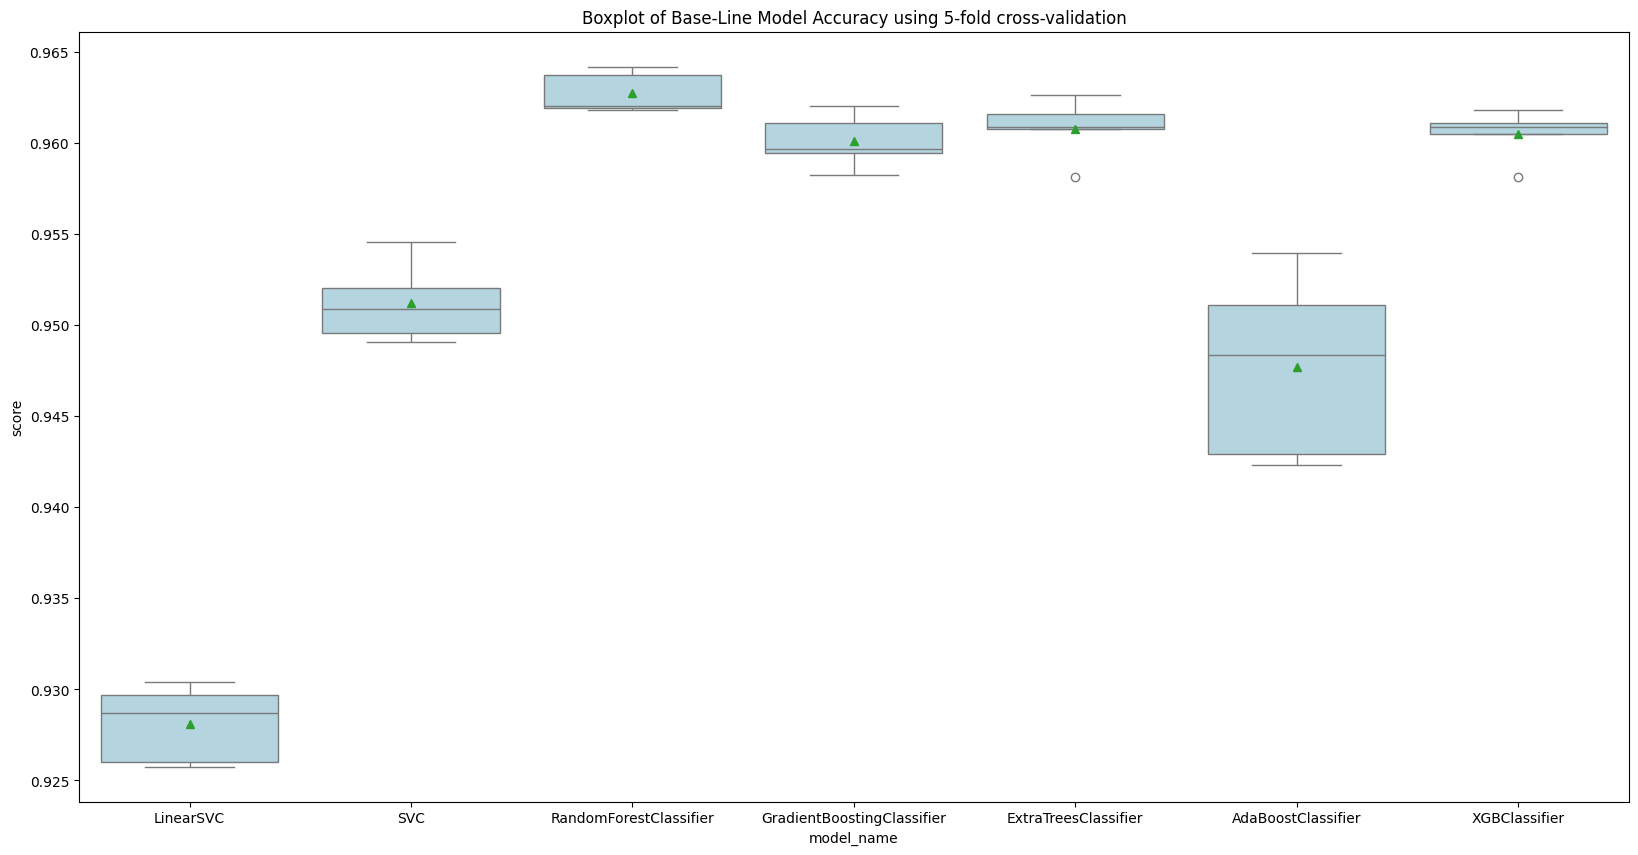

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.962734,0.001124
ExtraTreesClassifier,0.960782,0.001670
XGBClassifier,0.960473,0.001402
GradientBoostingClassifier,0.960092,0.001491
SVC,0.951216,0.002198
AdaBoostClassifier,0.947718,0.005087
LinearSVC,0.928109,0.002127


In [9]:
def generate_baseline_result(models, X, y, metrics, cv, plot_result=False):
    # define k-fold
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'score'])
    
    mean = cv_df.groupby('model_name')['score'].mean()
    std = cv_df.groupby('model_name')['score'].std()
    
    baseline_results = pd.concat([mean,std],axis =1, ignore_index=True)
    baseline_results.columns =['Mean','Standard Deviation']
    baseline_results.sort_values(by=['Mean'], ascending = False, inplace = True)
    
    if plot_result:
        plt.figure(figsize=(20, 10))
        sns.boxplot(x ='model_name',y = 'score', data = cv_df, color ='lightblue',showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.show()
    
    return baseline_results

generate_baseline_result(models, X_train, y_train, metrics='accuracy',cv=5,plot_result =True )

## Fine - tune

In [10]:
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 6, 7],
    'min_samples_leaf': [2, 3, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=2023),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_val, y_val)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

## Re-train

In [11]:
final_model_train_valid = RandomForestClassifier(random_state=2023, **best_params)

X_train_valid = pd.concat([X_train, X_val], axis=0)
y_train_valid = pd.concat([y_train, y_val], axis=0)
final_model_train_valid.fit(X_train_valid, y_train_valid)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=2023)

## Test on test set

In [12]:
y_pred_final_train_valid = final_model_train_valid.predict(X_test)
accuracy_final_train_valid = accuracy_score(y_test, y_pred_final_train_valid)

## Evaluation

In [13]:
print(f"Accuracy of the Final Model on Test Set: {accuracy_final_train_valid}")

Accuracy of the Final Model on Test Set: 0.96435313714603


## Visualize

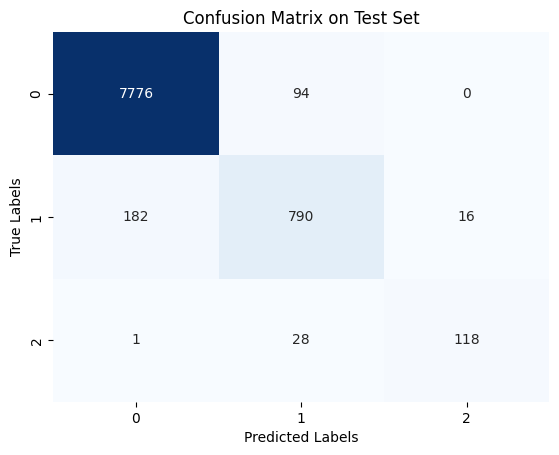

In [14]:
cm = confusion_matrix(y_test, y_pred_final_train_valid)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Test Set')
plt.show()

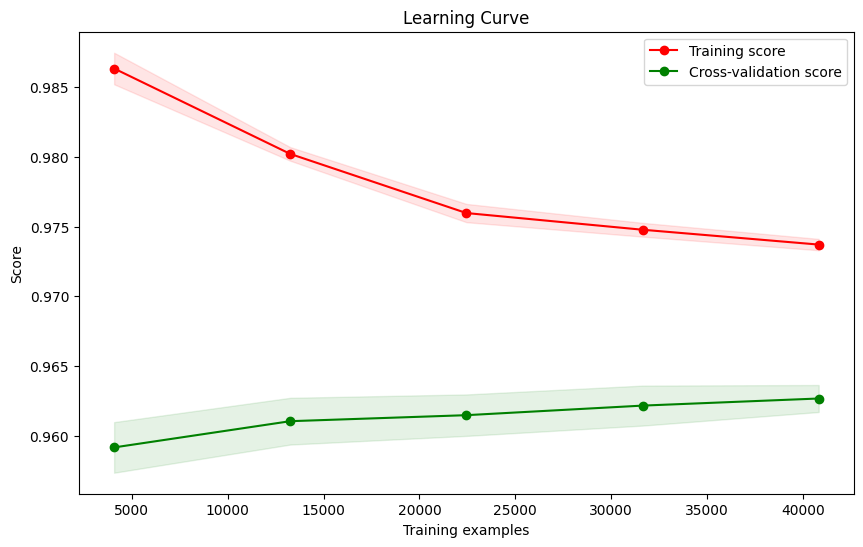

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(accuracy_score)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1, color="g"
    )

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

model = RandomForestClassifier(random_state=2023, n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

plot_learning_curve(model, "Learning Curve", X_train_valid, y_train_valid, cv=cv, n_jobs=-1)
plt.show()

## Conclusion

* Because the initial accuracy of the RandomForestClassifier model was quite high (>0.96), after fine-tuning, the accuracy increased but not significantly.
* Increasing accuracy may come at the expense of many other things (overfitting, ...).

* In the learning curve graph, the training scores and cross-validation scores tend to converge. This is a pretty good sign of the model's ability to generalize when predicting new data.
* More data is needed for the model to converge better.